1. [Mapping Templates - AWS & HTTP Integration](#Mapping-Templates---AWS-&-HTTP-Integration)
2. [Mapping Template Example: JSON to XML with SOAP](#copy-ami-to-another-region)
3. [Mapping Templates - Query String Parameters](#copy-ami-to-another-region)
4. [Hands On - Mapping Templates](#Hands-On---Mapping-Templates)
5. [API Gateway - Stage Variables](#API-Gateway---Stage-Variables)
6. [API Gateway Stage Variables and Lambda Alias](#API-Gateway-Stage-Variables-and-Lambda-Alias)
7. [Hands On - API Gateway Stage Variables](#Hands-On---API-Gateway-Stage-Variables)

#### Mapping Templates - AWS & HTTP Integration Type:
- Mapping templates are used to modify request/response 
- It's created in Integration request and response
- Rename/Modify query string parameters
- Modify body content
- Add Headers
- Uses Velocity Template Language (VTL) for Loops, if-else statements, etc
- Filter output results (remove unnecessary data)
- Content Type can be set to "application/xml" or "application/json"

##### Mapping Template Example: JSON to XML with SOAP
- The Client sends a JSON request via REST API to API Gateway
- The API Gateway with the help of mapping templates modifies the request to form SOAP Request for SOAP API service
- The SOAP API Service provides the response for the request as SOAP response
- The SOAP response is again modified to JSON based response for the client to receive

Note:
- SOAP APIs are xml based and REST APIs are JSON based

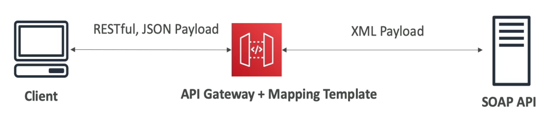

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/soap.jpeg')
new_image = img.resize((550, 120))
display(new_image)

#### Mapping Templates - Query String Parameters:

- The client send a HTTP request with query string parameter values to the API Gateway Service which uses Mapping Templates feature
- The API Gateway then modifies the query string parameter using mapping templates to rename the query string parameter variable names from "name" & "other" to "my_variable" & "other_variable"
- The modified request is then sent to the Lambda function

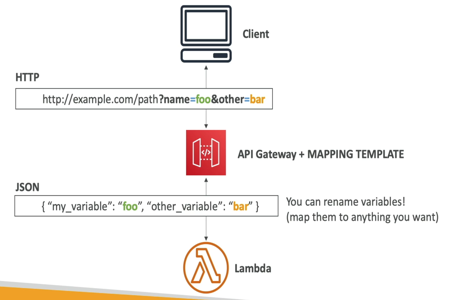

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/querystring.jpeg')
new_image = img.resize((450, 300))
display(new_image)

#### Hands On - Mapping Templates:
- Go to API Gateway console
    - Create a resource "mapping"
        - Create a Method
            - Lambda
                - Create a Lambda function
                    - Test the Lambda function (output => {"example": "Hello Lambda"})
                - Select the Lambda ARN
        - Go into the created method
            - Go into Integration Response
                - Mapping Template
                    - Create a template
                        - content type
                        - generate template
                        - template body
                        

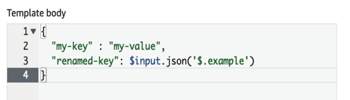

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/templatebody.jpeg')
new_image = img.resize((350, 100))
display(new_image)

The Above Template Body explained:
- "my-key": "my-value" (default written for understanding purpose)
- Then followed by the response sent by the Lambda function (Key-Value)
- The key from Lambda is replaced from "example" to "renamed-key"
- The $input defines the response received from the Lambda function

#### API Gateway - Stage Variables:
- They are similar to environment variables but for API Gateway
- Used for often changing configuration values
- Used in:
    - Lambda ARN
    - HTTP Endpoint
    - Parameter mapping templates
- Use case:
    - Configure HTTP endpoints your stages talk to (dev,test,prod)
    - Pass configuration parameters to Lambda through mapping templates
- Stage Variables are passed to Lambda function via "context" Object
- Format: ${stageVariables.variableName}

#### API Gateway Stage Variables and Lambda Alias:
- We create Stage Variables to invoke the correct Lambda function via Alias
- Refer the below image for example

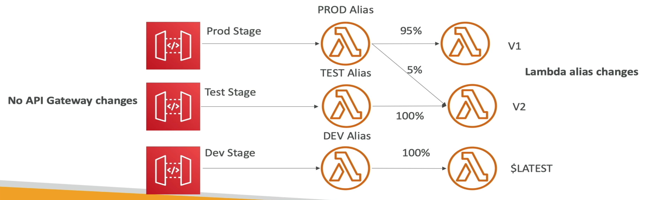

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/alias.jpeg')
new_image = img.resize((650, 200))
display(new_image)

#### Hands On - API Gateway Stage Variables:
- Go to API Gateway console
    - Go to the API created
        - Create a resource for stage variables
        - Ensure to Lambda function with several versions
            - Publish Each Version of Lambda function
                - The Dev version is not published and associated with $LATEST
            - Alias Each Version of Lambda Function
            - Copy the Lambda function ARN
        - Create Method
            - Method Type
            - Integration Type
                - Lambda
            - Lambda ARN
                - Paste the copied Lambda ARN + ":$(stageVariable.lambdaAlias)"
                - Once the previous step is performed it provides an IAM command to run in order add the necessary permissions to Lambda Function


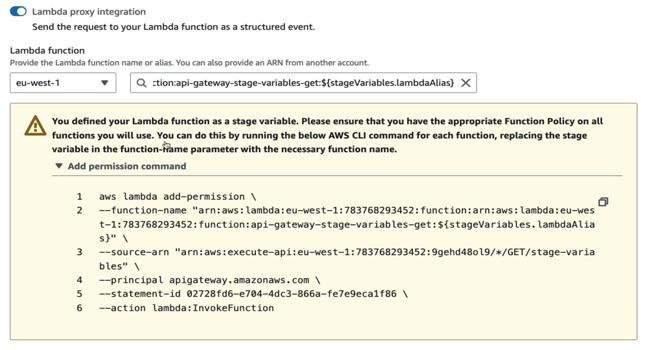

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables.jpeg')
new_image = img.resize((650, 350))
display(new_image)

Note:
- the provided IAM command needs to be rectified since the Lambda ARN is mentioned twice
- The IAM command is run three times for 3 Versions of Lambda function (PROD,DEV,TEST) by replacing the "${stageVariable.lambdaAlias} by DEV, PROD, TEST as shown in the below image

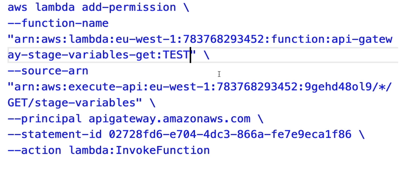

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables1.jpeg')
new_image = img.resize((400, 180))
display(new_image)

- Ensure to run the IAM command has been executed number of times before the creating the method is performed